# Generate different distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([72., 50., 60., 55., 58., 46., 36., 39., 35., 34., 37., 35., 32.,
        21., 26., 33., 23., 23., 21., 14., 16., 17., 14., 19.,  9.,  8.,
         6., 12.,  8.,  5.,  9., 10.,  7.,  7.,  6.,  2.,  9.,  8.,  6.,
         6.,  4.,  5.,  3.,  6.,  1.,  4.,  3.,  6.,  4.,  1.,  3.,  1.,
         0.,  1.,  4.,  2.,  1.,  0.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.08116442e-03, 6.64719922e-02, 1.31862820e-01, 1.97253648e-01,
        2.62644476e-01, 3.28035303e-01, 3.93426131e-01, 4.58816959e-01,
        5.24207787e-01, 5.89598615e-01, 6.54989443e-01, 7.20380270e-01,
        7.85771098e-01, 8.51161926e-01, 9.16552754e-01, 9.81943582e-01,
        1.04733441e+00, 1.11272524e+00, 1.17811607e+00, 1.24350689e+00,
        1.30889772e+00, 1.37428855e+00, 1.43967938e+00, 1.50507020e+00,
  

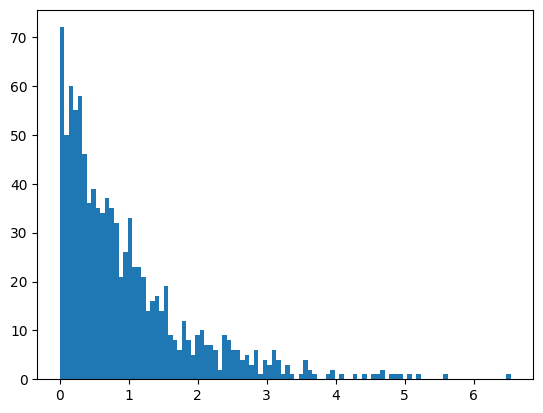

In [2]:
# exponent distribution
r = [1 - np.random.uniform(0, 1) for p in range(1000)]
x = -np.log(r)

fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  2.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  3.,  2.,
         0.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  1.,  0.,  4.,  1.,  2.,
         2.,  2.,  3.,  0.,  1.,  1.,  2.,  7.,  4.,  1.,  5.,  4.,  3.,
         2.,  4.,  6.,  4.,  8.,  6.,  7.,  5.,  7.,  2.,  4.,  8.,  8.,
         6.,  7.,  8.,  7.,  7.,  7.,  5., 11.,  5.,  6.,  7., 10.,  7.,
         7.,  8.,  8.,  8.,  9., 10., 13., 16., 14., 13., 12., 12., 13.,
         8., 13., 17., 15., 12., 12., 13., 10., 15., 13.,  6., 15., 20.,
        12., 14., 13., 13., 13.,  8., 17., 14., 17., 11., 12.,  9., 11.,
        10., 10.,  9., 14., 10.,  6.,  6.,  7.,  7.,  8., 11.,  1.,  6.,
         9.,  5.,  7., 10.,  6.,  8.,  4.,  7.,  6.,  9.,  4.,  9.,  6.,
         7.,  2.,  6.,  1.,  3.,  1.,  4.,  4.,  4.,  6.,  9.,  1.,  7.,
         3.,  3.,  1.,  1.,  1.,  4.,  2.,  2.,  0.,  2.,  0.,  2.,  0.,
         7.,  0.,  2.,  0.,  3.,  1.,  2.,  0.,  0.

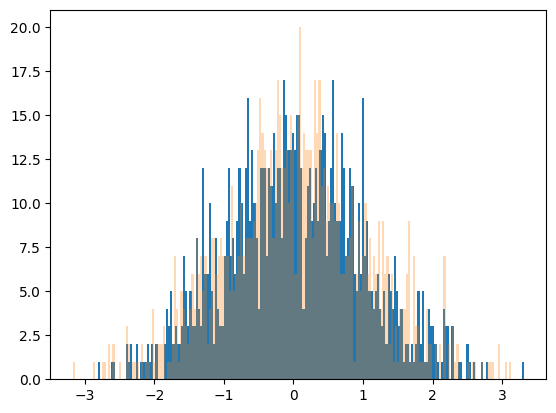

In [3]:
# Generate random numbers using Box-Muller transform
r = np.array([np.random.uniform(0, 1) for p in range(1000)])
s = np.array([np.random.uniform(0, 1) for p in range(1000)])

x = np.sqrt(-2*np.log(r))*np.cos(2*np.pi*s)
y = np.sqrt(-2*np.log(r))*np.sin(2*np.pi*s)
plt.hist(x, bins=200)
plt.hist(y, bins=200,alpha = 0.3)

# Markov chain

In [4]:
#genereate a next state
class MarkovChain:
    def __init__(self,state=1,num_state=5):
        self.state = state
        self.num_state = num_state
        
    def yield_state(self):
        num = np.random.uniform(0,1)
        if (num < 1/3):
            self.state = self.state
        elif (1/3 <=num<2/3):
            self.state = (self.state +1)%self.num_state
        else:
            self.state = (self.state -1 +self.num_state)%self.num_state
        return self.state

    def occurrence(self,num_chain=100):
        occur = np.arange(0,5,1)
        for i in range(num_chain):
            self.state = self.yield_state()
            print("The state is",self.state)
            occur[self.state] +=1
        return occur
    
    def transition_matrix(self):
        tran_mat = np.zeros((5,5))
        for i in range(self.num_state):
            tran_mat[i][i] = 1 / 3  # Stay in the same state with probability 1/3
            tran_mat[i][(i + 1) % self.num_state] = 1 / 3  # Move to the next state
            tran_mat[i][(i - 1 + self.num_state) % self.num_state] = 1 / 3  # Move to the back state     
        return tran_mat
    
    def probability(self,init_prob,num_chain=100):
        if (num_chain ==0):
            next_prob = init_prob
        else:
            for i in range(num_chain):
                next_prob = self.transition_matrix().dot(init_prob)
                init_prob = next_prob
        return next_prob
    
    def observable(self,init_prob,num_chain=2):
        o = 0
        final_prob= self.probability(init_prob=init_prob,num_chain=num_chain)
        for i in range(self.num_state):
            o+=final_prob[i]*i
        return o
                  

# Plot occurence of states after n steps

The state is 1
The state is 2
The state is 1
The state is 2
The state is 2
The state is 3
The state is 4
The state is 0
The state is 1
The state is 2
The state is 2
The state is 1
The state is 2
The state is 2
The state is 3
The state is 4
The state is 3
The state is 4
The state is 3
The state is 3
The state is 2
The state is 3
The state is 2
The state is 3
The state is 3
The state is 2
The state is 2
The state is 3
The state is 2
The state is 2
The state is 1
The state is 0
The state is 0
The state is 1
The state is 0
The state is 1
The state is 1
The state is 0
The state is 0
The state is 0
The state is 0
The state is 0
The state is 1
The state is 2
The state is 2
The state is 2
The state is 3
The state is 2
The state is 2
The state is 2
The state is 2
The state is 3
The state is 4
The state is 3
The state is 2
The state is 3
The state is 2
The state is 2
The state is 3
The state is 3
The state is 3
The state is 3
The state is 3
The state is 4
The state is 0
The state is 0
The state 

/tmp/ipykernel_13678/3226990620.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


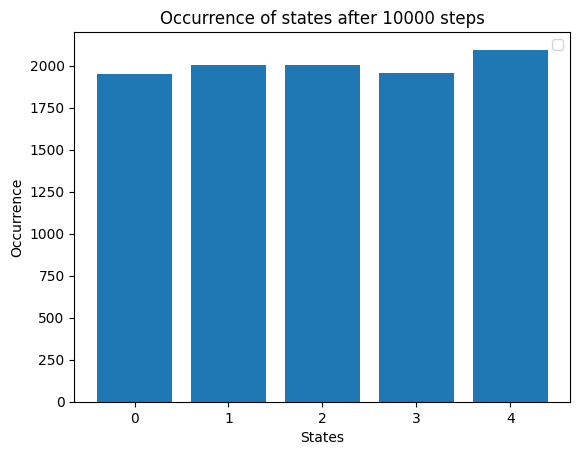

In [5]:
markov_chain = MarkovChain(state=1 )
markov_chain.yield_state()
num_chain=10000
occur = markov_chain.occurrence(num_chain)
print("occurrence",occur)

plt.bar(np.array([0,1,2,3,4]),occur)
plt.xlabel('States')
plt.ylabel('Occurrence')
plt.title(f'Occurrence of states after {num_chain} steps')
plt.legend()

plt.show()

In [6]:

tran_mat = markov_chain.transition_matrix()
# print("transition matrix\n",tran_mat)
init = np.array([1,0,0,0,0])
prob = markov_chain.probability(init)
print(prob)

[0.2 0.2 0.2 0.2 0.2]


/tmp/ipykernel_13678/3247274190.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


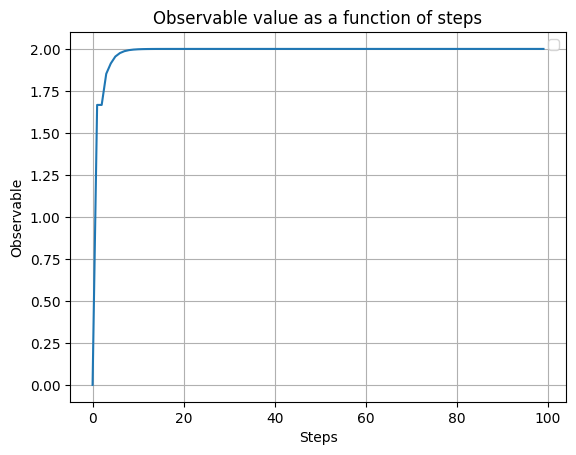

In [7]:
numchain = np.arange(0,100,1)
obs = np.array([markov_chain.observable(init_prob=init,num_chain=i) for i in numchain])
# print(obs)
plt.plot(numchain,obs)
plt.xlabel('Steps')
plt.ylabel('Observable')
plt.title(f'Observable value as a function of steps')
plt.grid()
plt.legend()

plt.show()